<a href="https://colab.research.google.com/github/emrullahozkilinc/patika-dev/blob/main/energy_efficency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as splitter
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.datasets import make_classification

**Data Titles:**


*   **X1** Relative Compactness
*   **X2** Surface Area
*   **X3** Wall Area
*   **X4** Roof Area
*   **X5** Overall Height
*   **X6** Orientation
*   **X7** Glazing Area
*   **X8** Glazing Area Distribution
*   **y1** Heating Load
*   **y2** Cooling Load

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/emrullahozkilinc/machine-learning/master/dataset/energy_efficency.csv')

In [25]:
data.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [26]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**Relative Compactness**

In [27]:
data['X1'].unique()

array([0.98, 0.9 , 0.86, 0.82, 0.79, 0.76, 0.74, 0.71, 0.69, 0.66, 0.64,
       0.62])

In [28]:
data.groupby(['X1'], axis=0)['X1'].count()

X1
0.62    64
0.64    64
0.66    64
0.69    64
0.71    64
0.74    64
0.76    64
0.79    64
0.82    64
0.86    64
0.90    64
0.98    64
Name: X1, dtype: int64

**Surface Area**

In [29]:
for x in data.columns:
  print(data[x].nunique())

12
12
7
4
2
4
4
6
586
636


In [30]:
for x in data.iloc[:,:8].columns:
  print(data[x].unique())

[0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
[514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
[294.  318.5 343.  416.5 245.  269.5 367.5]
[110.25 122.5  147.   220.5 ]
[7.  3.5]
[2 3 4 5]
[0.   0.1  0.25 0.4 ]
[0 1 2 3 4 5]


(array([ 17.,  46., 144., 122.,  48.,  22.,   6.,  58.,  34.,  71.,  73.,
         22.,  45.,  36.,  24.]),
 array([ 6.01      ,  8.48266667, 10.95533333, 13.428     , 15.90066667,
        18.37333333, 20.846     , 23.31866667, 25.79133333, 28.264     ,
        30.73666667, 33.20933333, 35.682     , 38.15466667, 40.62733333,
        43.1       ]),
 <a list of 15 Patch objects>)

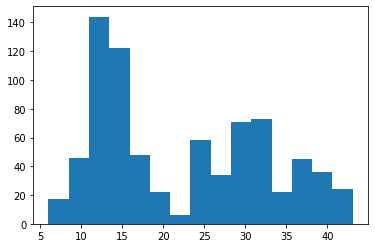

In [31]:
plt.hist(data['Y1'], bins=15)

(array([ 26., 184., 112.,  42.,  27.,  21.,  47.,  70.,  50.,  71.,  52.,
         31.,  11.,  16.,   8.]),
 array([10.9       , 13.37533333, 15.85066667, 18.326     , 20.80133333,
        23.27666667, 25.752     , 28.22733333, 30.70266667, 33.178     ,
        35.65333333, 38.12866667, 40.604     , 43.07933333, 45.55466667,
        48.03      ]),
 <a list of 15 Patch objects>)

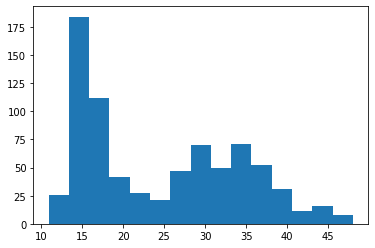

In [32]:
plt.hist(data['Y2'], bins=15)

In [33]:
X_train, X_test, y_train, y_test = splitter(data.iloc[:,:-2], 
                                            data.iloc[:,8:], 
                                            test_size = 0.301)
X_validation, X_test, y_validation, y_test = splitter(X_test,
                                                      y_test,
                                                      test_size = 0.5)

In [34]:
clf_decision_tree = DecisionTreeRegressor()
clf_decision_tree.fit(X_train, y_train)
clf_decision_tree.score(X_validation, y_validation)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9739699383983255

In [35]:
pred_decision_tree = clf_decision_tree.predict(X_test)

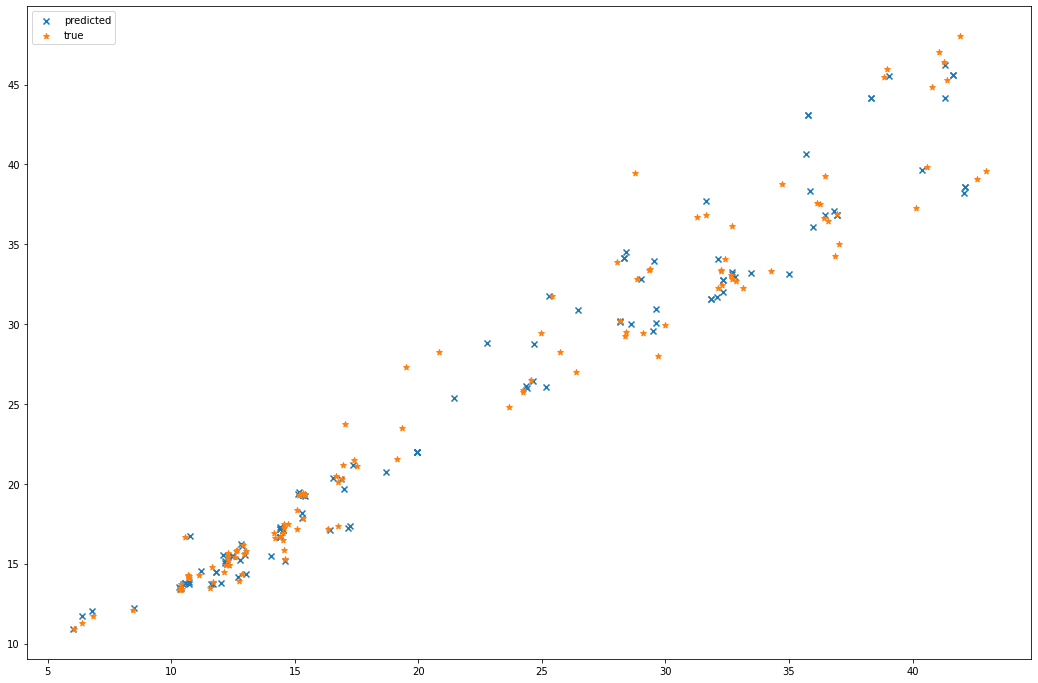

In [36]:
plt.figure(figsize=(18,12))
plt.scatter(pred_decision_tree[:,0], 
            pred_decision_tree[:,1], 
            marker = 'x', 
            label = 'predicted')
plt.scatter(y_test.iloc[:,0], y_test.iloc[:,1], marker='*', label = 'true')
plt.legend()

In [37]:
clf_random_forest = RandomForestRegressor(oob_score=True,n_estimators=500)

In [38]:
clf_random_forest.fit(X_train, y_train)
train_score = clf_random_forest.score(X_train, y_train)
valid_score = clf_random_forest.score(X_validation, y_validation)

print('Train Score = ',train_score, 'Validaiton Score = ', valid_score, sep = ' ')

Train Score =  0.997208540000253 Validaiton Score =  0.9814065794375325


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [41]:
n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 3, 5]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [44]:
rf_random = RandomizedSearchCV(clf_random_forest, 
                               random_grid, 
                               n_iter=100, 
                               cv = 3, 
                               verbose = 2, 
                               n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=500,
                              

In [48]:
rf_random.score(X_validation, y_validation)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9837538805471687

In [45]:
predict_random_forest = rf_random.predict(X_test)

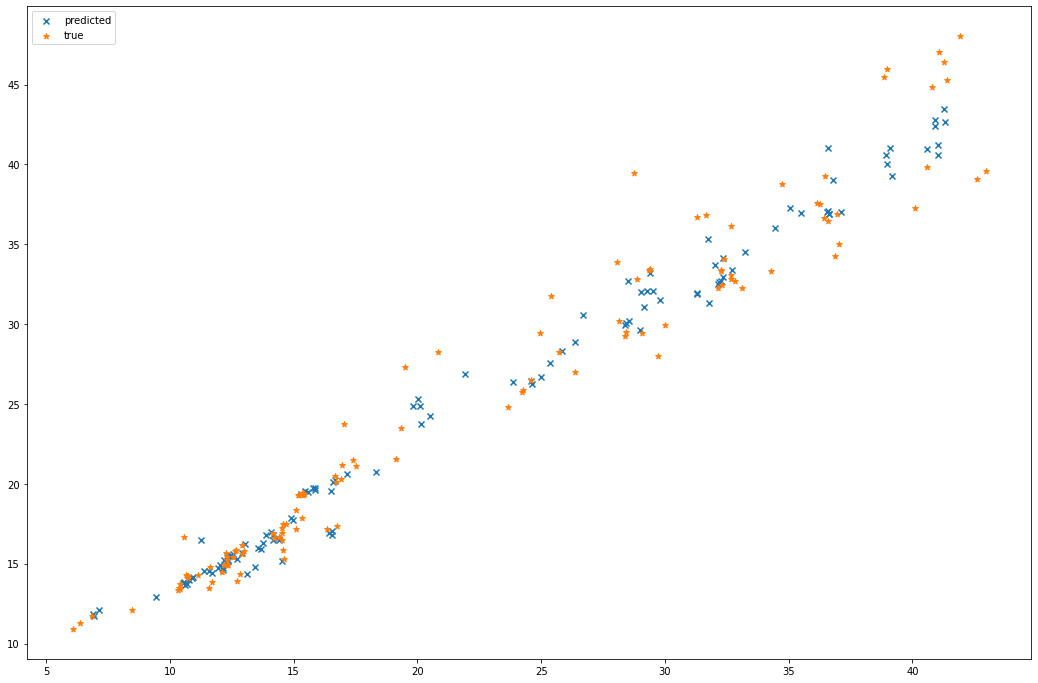

In [46]:
plt.figure(figsize=(18,12))
plt.scatter(predict_random_forest[:,0], 
            predict_random_forest[:,1], 
            marker = 'x', 
            label = 'predicted')
plt.scatter(y_test.iloc[:,0], y_test.iloc[:,1], marker='*', label = 'true')
plt.legend()

In [50]:
clf_adaboost = AdaBoostRegressor()

In [66]:
base_estimator = [DecisionTreeRegressor(max_depth=x) for x in range(1,6)]
n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
learning_rate = [0.5, 1.0, 2.0]
loss = ['linear', 'square', 'exponential']

ada_random_grid = {
    'base_estimator':base_estimators,
    'n_estimators':n_estimators,
    'learning_rate':learning_rate,
    'loss':loss
}

In [72]:
ada_random_0 = RandomizedSearchCV(clf_adaboost, 
                                ada_random_grid, 
                                n_iter=50, 
                                cv = 3, 
                                verbose = 2, 
                                n_jobs=-1)

ada_random_0.fit(X_train, y_train.iloc[:,0])

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'base_estimator': [DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                 criterion='mse',
                                                                                 max_depth=1,
                                                                                 max_features=None,
                                                                                 max_leaf_nodes=None,
                                                                                 min_impurity_decr...
                           

In [78]:
ada_random_0.score(X_validation, y_validation.iloc[:,0])

0.9970668024106293

In [79]:
ada_random_1 = RandomizedSearchCV(clf_adaboost, ada_random_grid, n_iter=50, 
                                  cv = 3, verbose = 2, n_jobs=-1)

ada_random_1.fit(X_train, y_train.iloc[:,1])

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'base_estimator': [DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                 criterion='mse',
                                                                                 max_depth=1,
                                                                                 max_features=None,
                                                                                 max_leaf_nodes=None,
                                                                                 min_impurity_decr...
                           

In [83]:
ada_random_1.score(X_validation,y_validation.iloc[:,1])

0.9653207666978443

In [85]:
print('Scores:')
print('Decision tree score is: ', round(clf_decision_tree.score(X_test, y_test), 5) )
print('Random forests score is: ', round(rf_random.score(X_test, y_test), 5) )
print('Adaboost score for Y1 is: ', round(ada_random.score(X_test, y_test.iloc[:,0]), 5) )
print('Adaboost score for Y1 is: ', round(ada_random_1.score(X_test, y_test.iloc[:,1]), 5) )

Scores:
Decision tree score is:  0.96078
Random forests score is:  0.98063
Adaboost score for Y1 is:  0.99774
Adaboost score for Y1 is:  0.96036


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi